In [4]:
import os
import numpy as np
from numpy import array
import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt

# from mockfactory import Catalog
from cosmoprimo.fiducial import DESI
from desilike.theories.galaxy_clustering import DirectPowerSpectrumTemplate, ShapeFitPowerSpectrumTemplate, StandardPowerSpectrumTemplate
from desilike.theories.galaxy_clustering import KaiserTracerPowerSpectrumMultipoles, TNSTracerPowerSpectrumMultipoles, FOLPSTracerPowerSpectrumMultipoles
from desilike.observables.galaxy_clustering import TracerPowerSpectrumMultipolesObservable
from desilike.emulators import EmulatedCalculator, Emulator, TaylorEmulatorEngine
from desilike.likelihoods import ObservablesGaussianLikelihood
from desilike.samples import Profiles
from desilike import setup_logging
setup_logging()  # for logging messages

In [3]:
kmin     = 0.008
kmax     = 0.2
binning  = 0.006
k_ev     = np.arange(kmin, kmax+0.001, binning)
klim     = {ell*2: (kmin,kmax,binning) for ell in range(2)}

# the cosmology parameters
catalogue   = 'fiducial'  # fiducial, Mnu_p, Mnu_ppp -- QUIJOTE catalogue
cosmology   = 'LCDM'  # LCDM, nuCDM, nsFree, wCDM -- cosmology model
r_pk        = 'RSD'  # RSD, LRG, QSQ, CATAS-- systematics
CovRsf      = 25  # -- covariance rescale factor

In [4]:
# Set the theoretical model and train the emulator
redshift= 0.5
model   = 'FOLPS' # Kaiser, TNS, FOLPS

# data files
filename = []
filedir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z{redshift}/npy/'
for file in os.listdir(filedir):
    filename.append(filedir+file)
covariance = filedir+'*'
print(filename)

# The template and theory
cosmo = DESI()
template = DirectPowerSpectrumTemplate(z=redshift,apmode='qisoqap', fiducial='DESI')
if model == 'Kaiser':
    theory = KaiserTracerPowerSpectrumMultipoles(template=template, k=k_ev)
elif model == 'TNS':
    theory = TNSTracerPowerSpectrumMultipoles(template=template, k=k_ev)
elif model == 'FOLPS':
    theory = FOLPSTracerPowerSpectrumMultipoles(template=template, k=k_ev)
    
observable = TracerPowerSpectrumMultipolesObservable(data= filename,
                                                covariance= covariance,
                                                klim=klim,
                                                theory=theory)
likelihood = ObservablesGaussianLikelihood(observable, scale_covariance = 1/CovRsf) #
likelihood()

# Training emulator
emulator_fn = f'./model/emulator_{model}_z{redshift}.npy'
if not os.path.exists(emulator_fn):
    emulator = Emulator(theory.pt, engine=TaylorEmulatorEngine(order=2, method='finite')) # Taylor expansion, up to a given order
    emulator.set_samples() # evaluate the theory derivatives (with jax auto-differentiation if possible, else finite differentiation)
    emulator.fit()
    emulator.save(emulator_fn)
    print("Training finished")

['/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_125_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_124_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_152_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_153_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_189_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_188_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_166_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_167_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_183_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z0.5/npy/fiducial_182_z0.5.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RS

['/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_122_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_123_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_155_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_154_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_161_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_160_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_128_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_129_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_184_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z1.0/npy/fiducial_185_z1.0.npy', '/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RS

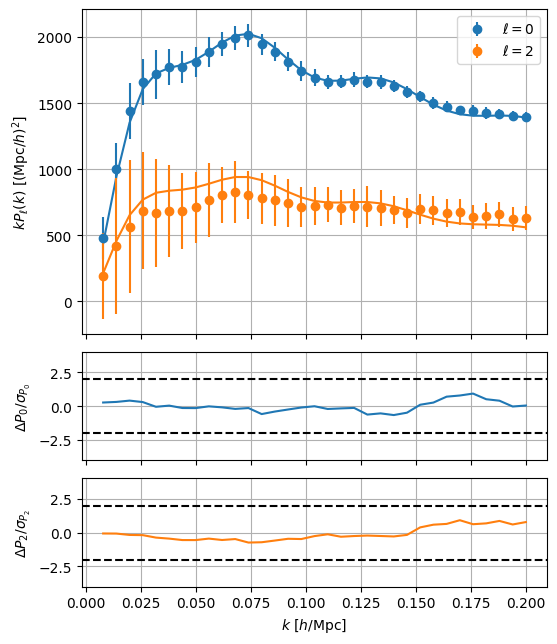

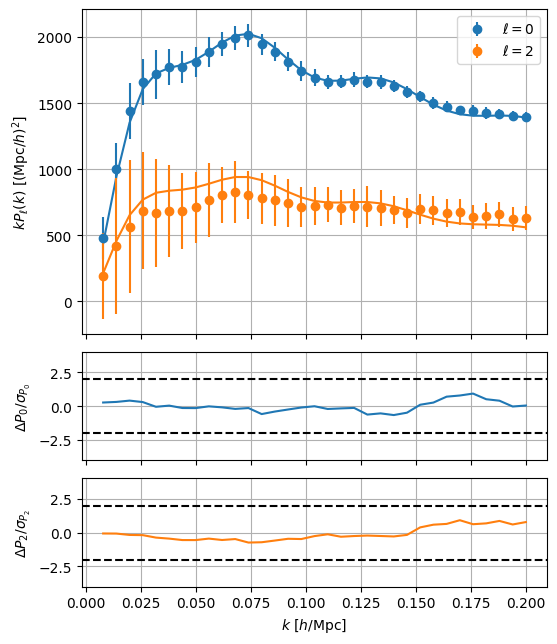

In [16]:
redshift = 1.0
model = 'Kaiser' # Kaiser, TNS, FOLPS

emulator_fn = f'./model/emulator_{model}_z{redshift}.npy'
profile_fn = f'./profiler_result/profile_{model}_z{redshift}.npy'

# data files
filename = []
# filedir = '/home/astro/shhe/projectNU/main/data/halos_kbin0.05/fiducial/RSD_z0.5/npy/'
filedir = f'/Users/alain/Desktop/projectNU/main/data/kbin2/fiducial/RSD_z{redshift}/npy/'
for file in os.listdir(filedir):
    filename.append(filedir+file)
covariance = filedir+'*'

if model == 'Kaiser':
    theory = KaiserTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
elif model == 'TNS':
    theory = TNSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
elif model == 'FOLPS':
    theory = FOLPSTracerPowerSpectrumMultipoles(pt=EmulatedCalculator.load(emulator_fn))
observable = TracerPowerSpectrumMultipolesObservable(data= filename,
                                                    covariance= covariance,
                                                    klim=klim,
                                                    theory=theory,
                                                    # kin=np.arange(0.001,0.35,0.002)
                                                    )
likelihood = ObservablesGaussianLikelihood(observable, scale_covariance = 1/1) #
likelihood()
profiler = MinuitProfiler(likelihood, seed=42)
profiles = profiler.maximize()
profiles.save(profile_fn)
print("Profiler finished")
print(profiles.to_stats(tablefmt='pretty'))
likelihood(**profiles.bestfit.choice(input=True))
observable.plot()